Basic principles of the perceptron and weight updates using error on a single input. Includes link to tutorial to use perceptron to classify sonar data. Completed February 2021 by Annik Carson 

*** TO DO: expand perceptron fruits example

# Basics of Neural Networks - The Perceptron
Neural networks started as an attempt to model the function of biological neurons. Neurons receive information at their dendrites from other cells at connection points called synapses. These synapses control how strongly the neuron can detect the signal it receives. The neuron combines all of these signals at the cell body and if they pass a certain threshold, this neuron will send a signal down the axon to its terminals, which connect with the dendrites of other neurons, and so the signal can propagate between cells. 

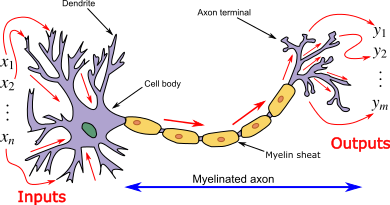

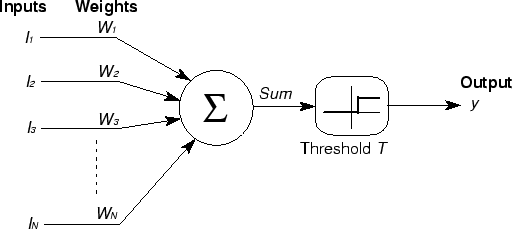

This input-output relationship can be modelled mathematically: some number of inputs $I_1$, $I_2$, ... $I_N$ are scaled by corresponding weights $W_1$, $W_2$, ... $W_N$ (analogous to the strength of a synapse in a neuron) and then summed together. This sum is passed through an activation function -- if the signal is high enough then the activation function will produce an output y. 

In 1958 Frank Rosenblatt designed The Perceptron, which improved upon this idea by tuning the weights through experience. Given some input, the Perceptron produces an output. The error between the output and the desired output can be used to change the weights so that on successive passes, the perceptron will produce an output closer to the target. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
num_inputs = 10
inputs = np.random.randn(num_inputs)
print(inputs)

[-0.35840858  0.32936578  1.10239579  0.20749254  1.58892439  0.06491894
 -0.24149384  0.9785851   0.94868184 -0.6902626 ]


In [ ]:
# make weight values
weights = np.random.randn(num_inputs)
print(weights)

[ 0.80181757  0.49523735 -0.26501628  0.15023341 -1.04848246 -0.40129121
  0.20311404 -0.05944853  0.08384812 -0.49130357]


In [ ]:
# get the sum of all the activities 
def compute_activity(inputs, weights):
  activity = 0
  for i, w in zip(inputs,weights):
    activity += i*w
  return activity

activity = compute_activity(inputs,weights)
print(activity)

-1.7658078983575112


## Activation Functions 
The activation function controls the output. Here, we will use a step function which takes the activity and converts it to a 0-1 signal. This is useful for a problem where we want to classify inputs into one of two groups

In [ ]:
def step_function(input_num):
  # step function
  if input_num < 0:
    return 0
  else:
    return 1

def relu_function(input_num):
  # rectified linear unit activation function
  if input_num < 0:
    return 0 
  else: 
    return input_num

In [ ]:
activation_function = relu_function

# get the output by passing through the activation function
output = activation_function(activity)
print(output)

0


Suppose for this particular input we want the output to be 10. How should we adjust the weights to get the output to be closer to 10? 

In [ ]:
target = 10 
print(f'Output was {output}, target is {target}')
error = target - output 
print(f'Error is {error}')


Output was 0, target is 10
Error is 10


How do we change the weights to get closer to the target? We can use the error to scale the weights -- given some input X, we need X*error amount of change to the weights to get the target output when X is passed to the perceptron next time 


In [ ]:
# weight change for input X should be: 
weight_change_for_x = error*inputs
print(weight_change_for_x)

[-3.5840858   3.29365777 11.02395788  2.07492541 15.88924395  0.64918941
 -2.41493844  9.78585099  9.48681842 -6.90262599]


## The learning rule 
This is the most important step of the algorithm, so take some time to understand exactly what is happening here

In [ ]:
# we will update the weights to be weights + weight_change_for_x
learning_rate = 0.1
weights = weights + learning_rate*weight_change_for_x

In [ ]:
#test that the weight change gave the desired result
# for the input vector, do the new weights give the target output? 

new_output = compute_activity(inputs,weights) # the weights vector was updated in the previous cell
print(new_output)

4.650763220782684


In [ ]:
error = target - new_output
weight_change_for_x = error*inputs
weights = weights + learning_rate*weight_change_for_x

new_output = compute_activity(inputs, weights)
print(new_output)

8.083139043479518


Notice that the weights are not immediately updated to the correct values that will give our desired output. But if you run the cell above several times, it will converge on the desired output. Why is this? 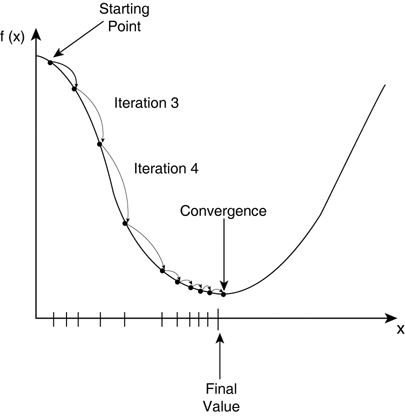

As we makes steps in our iteration, our error gets smaller and smaller. In the cell below, this process is written in a loop. Remember, we want the error to go towards zero. 

# The Perceptron Learning Algorithm

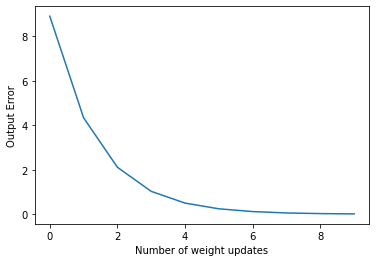

In [ ]:
# track what the error will be over several steps of updating the weights
error_record = []

# starting the whole thing again with new inputs and weights: 
num_inputs = 10
inputs = np.random.randn(num_inputs)
# set the target value for this particular input 
target = 10

# randomly initialize the weights
weights = np.random.randn(num_inputs)

# set activation function we will be using -- see what happens switching to a 
# different activation function
activation_function = relu_function

# set the size of step for each improvement on the weights
learning_rate = 0.1

num_iter = 10

for iteration in range(num_iter):
  # compute the activity of the input (fixed) with the current value of the 
  # weights (which updates each iteration)
  activity = compute_activity(inputs,weights)

  # get the output by passing through the activation function
  output = activation_function(activity)

  # compute the error for that particular setting of the weights
  error = target - output 

  # log this error in your record
  error_record.append(error)

  # compute how much the weights should be changed
  weight_change_for_x = error*inputs
  
  # update the weights
  weights = weights + learning_rate*weight_change_for_x

# plot the results 
plt.plot(error_record)
plt.ylabel('Output Error')
plt.xlabel('Number of weight updates')
plt.show()

Reproduce the plot above but vary learning rate. What happens to the error? What pattern do you notice? Compare several values in the code block below and observe the plot of the results. Remember, this is all for minimizing the error in predicting the correct output for your input vector of random values. We just decided the target value was 10 arbitrarily, and this procedure will successively modify the weights to produce that output when the weight vector and input vector are multiplied.

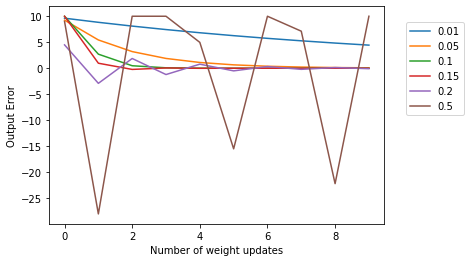

In [ ]:
error_record_dict = {}
num_inputs = 10 # how many units in the input vector
inputs = np.random.randn(num_inputs)
target = 10 # an arbitrary value we are trying to push the weights to produce given this particular input
activation_function = relu_function

num_iter = 10 # how many times you want to update the weights 

for learning_rate in [0.01, 0.05, 0.1, 0.15, 0.2, 0.5]:
  # initialize a new empty list to store error values in 
  error_record_dict[learning_rate] = [] 
  # get a new starting weight vector for each new learning rate 
  weights = np.random.randn(num_inputs)

  for iteration in range(num_iter):
    # compute the activity of the input (fixed) with the current value of the 
    # weights (which updates each iteration)
    activity = compute_activity(inputs,weights)

    # get the output by passing through the activation function
    output = activation_function(activity)

    # compute the error for that particular setting of the weights
    error = target - output 

    # log this error in your record
    error_record_dict[learning_rate].append(error)

    # compute how much the weights should be changed
    weight_change_for_x = error*inputs
    
    # update the weights
    weights = weights + learning_rate*weight_change_for_x

# plot the results for each learning rate in the test set 
plt.figure()
for i in error_record_dict:
  plt.plot(error_record_dict[i], label=f'{i}')

plt.legend(bbox_to_anchor=(1.05, 0.95))
plt.ylabel('Output Error')
plt.xlabel('Number of weight updates')
plt.show()


So far, we have just done weight updates on one single input vector. What we ultimately want is to tweak the weights in such a way that it can provide the correct output for many different inputs. For the following example we will try to classify fruit into either "apples" or "oranges" categories using height and weight as input features.

In [16]:
# import some more stuff for the apples-oranges example
import pandas as pd # for reading in data
import seaborn as sns # for plotting
import math
# we have offloaded our classes defined previously to py files which we need to import here to use in this notebook 
from google.colab import drive
drive.mount('/content/drive')
import sys

working_dir = 'drive/My Drive/Colab Notebooks/Basics of Reinforcement Learning/'
sys.path.insert(0,'/content/'+working_dir) ## will have to change this path! 


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [17]:
# import data from text file 
fruits = pd.read_table(working_dir+'pyfiles/apples_n_oranges.txt') ### to do == fix import 
fruits.head()

,fruit_label,fruit_name,mass,width,height,color_score
0,0,apple,140,7.3,7.1,0.87
1,1,orange,140,6.7,7.1,0.72
2,0,apple,152,7.6,7.3,0.69
3,1,orange,142,7.6,7.8,0.75
4,1,orange,144,6.8,7.4,0.75


## 1: Get a sense of the data
### An important part of a training set is ensuring you have an equal (or almost equal) number of samples per class. Determine how many samples per class are in this dataset and if this will be a good dataset to train on. **bold text**

In [18]:
print(fruits['fruit_name'].unique())

['apple' 'orange']


fruit_name
apple     19
orange    19
dtype: int64


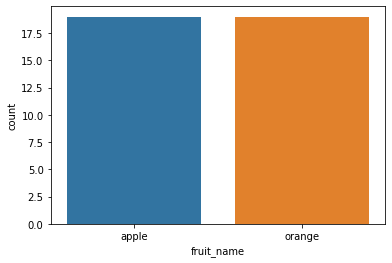

In [23]:
print(fruits.groupby('fruit_name').size())
sns.countplot(x=fruits['fruit_name'],label="Count")
plt.show()

## 2: Prepare the data for training
### Split the data into training data (80% of the data) and testing data (20% of the data)
#### Hint: Use pandas functions "sample" and "drop" 

In [26]:
train = fruits.sample(frac=0.8, random_state=200)
test = fruits.drop(train.index)

print("example subset of data for training:\n", train)

print("example subset of data for testing:\n", test)

example subset of data for training:
     fruit_label fruit_name  mass  width  height  color_score
2             0      apple   152    7.6     7.3         0.69
5             1     orange   150    7.1     7.9         0.75
20            0      apple   164    7.3     7.7         0.70
18            0      apple   162    7.5     7.1         0.83
8             1     orange   154    7.1     7.5         0.78
36            1     orange   356    9.2     9.2         0.75
35            1     orange   342    9.0     9.4         0.75
34            1     orange   210    7.8     8.0         0.82
30            1     orange   180    7.6     8.2         0.79
17            1     orange   160    7.1     7.6         0.76
28            0      apple   178    7.1     7.8         0.92
3             1     orange   142    7.6     7.8         0.75
0             0      apple   140    7.3     7.1         0.87
13            1     orange   158    7.1     7.5         0.79
21            1     orange   164    7.2     7.0

## 3: Separate data into inputs (feature values) and outputs (labels)
Our X values are the fruit's mass, width, height and color score. 

Our Y values are the fruit_label (0 for apple, 1 for orange). 

Separate the data into X values and Y values 

You should have inputs and outputs for both training and testing: 
*   X_train, Y_train
*   X_test, Y_test



In [28]:
# get a sample of the data to train the network with 
train = fruits.sample(frac=0.8, random_state=200)
# take the remaining data points to check that we trained the weights well and will get 
# good classification on previously unseen examples
test = fruits.drop(train.index)

# get which columns of the table correspond to input features
feature_names = ['mass', 'width', 'height', 'color_score']
X_train = train[feature_names] # this just takes data from the table "train" from the four columns with the headings in feature_names
y_train = train['fruit_label'] # this just takes data from the table "train" from the single column with the heading 'fruit_label'
X_test  = test[feature_names]
y_test  = test['fruit_label']

## 4: 
### If you look at the data, you'll notice some values are quite large (like mass) and some are quite small (like color_score). This can result in over-weighting input values. To fix this, scale each of the features from 0-1. 

In [29]:
def MinMaxScaler(x):
    ''' Transforms features by scaling each feature to range (0,1)'''
    scaled_xs = [] 
    x_min = np.min(x)
    x_max = np.max(x)
    for v in x:
        x_std = (v - x_min) / (x_max - x_min)
        x_scaled = x_std * (1 - 0) + 0
        scaled_xs.append(x_scaled)
    return scaled_xs 

In [30]:
# get the training data with data in all 4 input features scaled to the interval (0,1)
X_train_scaled = pd.DataFrame()
X_train_scaled['mass'] = MinMaxScaler(X_train['mass'])
X_train_scaled['width'] = MinMaxScaler(X_train['width'])
X_train_scaled['height'] = MinMaxScaler(X_train['height'])
X_train_scaled['color_score'] = MinMaxScaler(X_train['color_score'])


# get the testing data with data in all 4 input features scaled to the interval (0,1)
X_test_scaled = pd.DataFrame()
X_test_scaled['mass'] = MinMaxScaler(X_test['mass'])
X_test_scaled['width'] = MinMaxScaler(X_test['width'])
X_test_scaled['height'] = MinMaxScaler(X_test['height'])
X_test_scaled['color_score'] = MinMaxScaler(X_test['color_score'])

In [33]:
# show an example data point before scaling and after 
index = 0 
print("unscaled data:\n", X_train.iloc[index])
print("scaled data:  \n" , X_train_scaled.iloc[index])

unscaled data:
 mass           152.00
width            7.60
height           7.30
color_score      0.69
Name: 2, dtype: float64
scaled data:  
 mass           0.054054
width          0.310345
height         0.192308
color_score    0.368421
Name: 0, dtype: float64


## Make A Perceptron

In [36]:
weights = [0.46, 1.22, 1.04, -0.23]

# activation function 
def step_fxn(x):
    ''' an implementation of the step function'''
    if summation > 0:
        activation = 1   ### step function
    else:
        activation = 0 
    return activation 

In [40]:
# test a single pass through the perceptron: 
# sum inputs*weights
# pass through activation function
# compute error= |target - output|
index = 10 

example_input = X_train_scaled.iloc[index]
correct_label = y_train.iloc[index]

summation = sum(example_input*weights)

activation = step_fxn(summation)

error = correct_label - activation

print(f'For sample input {example_input.values}, perceptron gave output {activation}.\nTrue label was {correct_label}. \nError: {error}')


For sample input [0.17117117 0.13793103 0.38461538 0.97368421], perceptron guessed output 1.
True label was 0. 
Error: -1


## Train a perceptron to classify apples and oranges
Now we will step over all of the examples in the training set to update the weights such that it will produce a correct label for items of different categories. In the above cell we computed error but didn't use it to tweak the weights. Below we will do that repeatedly with different input data to iterate towards weights that give good output values for both kinds of inputs.

## 5:
### Train your perceptron:

### Forward Pass: 
(1) calculate the weighted sum over all the inputs 

(2) calculate the activation function 

### Calculate the error: error = correct answer - prediction

### Backwards pass: 
calculate the update for each weight using the formula w = w + learning rate * error * x
#### Note: you'll need to iterate over all samples in the training data for every epoch.

In [60]:
# want to calculate how many total labels we got correct on each epoch so we can print out how well we are doing 
def accuracy(n_correct, n_total):
    accuracy = n_correct / n_total
    return accuracy 

In [62]:
# set the parameters we will use to train the perceptron for different inputs 

learning_rate = 0.001 ## how large of updates should we make at each step
weights = [0.46, 1.22, 1.04, -0.23] 
epochs = 1000 ## number of times to iterate through all the training set examples and update the weights

# set up a list to keep track of your performance
track_pct_correct = []

for epoch in range(epochs):
    print_freq = 25 # print every 25 epochs 
    n_correct = 0 
    for idx in range(len(X_train_scaled)):
        ### select the training sample 
        X = X_train_scaled.iloc[idx]
        Y = y_train.iloc[idx]
        
        ### forward pass (1) calculate the weighted sum over all the inputs
        summation = sum(X*weights) 
        ### forward pass (2) calculate the activation function
        activation = step_fxn(summation)

        ### calculate the error 
        error = Y - activation
        if (error==0):
            n_correct +=1
        ### backwards pass: calculate the update to the weights. w = w + learning_rate *error*X
        d_weights = learning_rate * error* X
        weights = weights + d_weights

    acc = accuracy(n_correct, len(X_train_scaled))
    track_pct_correct.append(acc)
    if epoch % print_freq == 0:
      print('Epoch : ' + str(epoch))
      print('Accuracy is ' + str(100*acc) + '%')
      

Epoch : 0
Accuracy is 53.333333333333336%
Epoch : 25
Accuracy is 56.666666666666664%
Epoch : 50
Accuracy is 53.333333333333336%
Epoch : 75
Accuracy is 63.33333333333333%
Epoch : 100
Accuracy is 60.0%
Epoch : 125
Accuracy is 53.333333333333336%
Epoch : 150
Accuracy is 53.333333333333336%
Epoch : 175
Accuracy is 53.333333333333336%
Epoch : 200
Accuracy is 53.333333333333336%
Epoch : 225
Accuracy is 53.333333333333336%
Epoch : 250
Accuracy is 53.333333333333336%
Epoch : 275
Accuracy is 53.333333333333336%
Epoch : 300
Accuracy is 53.333333333333336%
Epoch : 325
Accuracy is 53.333333333333336%
Epoch : 350
Accuracy is 53.333333333333336%
Epoch : 375
Accuracy is 53.333333333333336%
Epoch : 400
Accuracy is 53.333333333333336%
Epoch : 425
Accuracy is 53.333333333333336%
Epoch : 450
Accuracy is 53.333333333333336%
Epoch : 475
Accuracy is 53.333333333333336%
Epoch : 500
Accuracy is 53.333333333333336%
Epoch : 525
Accuracy is 56.666666666666664%
Epoch : 550
Accuracy is 56.666666666666664%
Epoch : 

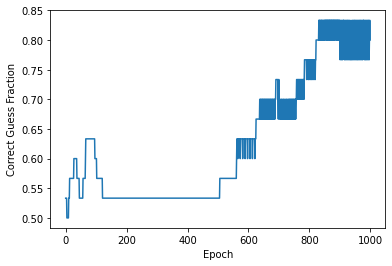

In [63]:

# plot the total accuracy over training
plt.figure()
plt.plot(track_pct_correct)
plt.xlabel('Epoch')
plt.ylabel('Correct Guess Fraction')
plt.show()

## 6:
### We evaluate our machine learning algorithms based on the accuracy the model gets on the testing set. Using your newly trained weights, iterate through each testing sample and determine the perceptron's prediction. Then, calculate the accuracy of your network on the testing data 
#### accuracy = 100 * (# correct / # samples)

In [44]:
n_correct = 0 
for idx in range(len(X_test_scaled)):
    
    ### select testing sample 
    X = X_test_scaled.iloc[idx]
    Y = y_test.iloc[idx]

    ### calculate the model output 
    summation = sum(X*weights)#+ bias
    activation = step_fxn(summation)
    
    ### add one to number correct if they match 
    if(activation == Y):
        n_correct += 1
    
accuracy = n_correct / len(X_test)
print('Accuracy is ' + str(100*accuracy) + '%')

Accuracy is 87.5%


# Additional Tutorials
An in depth tutorial on using the perceptron for binary classification in a real set of sonar data can be found [here](https://machinelearningmastery.com/implement-perceptron-algorithm-scratch-python/).
